In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import chardet    
rawdata = open('/content/books.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print(charenc)

Windows-1252


In [ ]:
df=pd.read_csv('/content/books.csv',encoding='Windows-1252')

In [ ]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,4.56,439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,4.49,439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,4.47,439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr?©,4.55,043965548X,9780439655484,eng,435,2149872,33964


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13713 entries, 0 to 13712
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              13713 non-null  int64  
 1   title               13713 non-null  object 
 2   authors             13713 non-null  object 
 3   average_rating      13713 non-null  float64
 4   isbn                13713 non-null  object 
 5   isbn13              13713 non-null  int64  
 6   language_code       13713 non-null  object 
 7   # num_pages         13713 non-null  int64  
 8   ratings_count       13713 non-null  int64  
 9   text_reviews_count  13713 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 1.0+ MB


# **Create a function to calculate weight rating**

Weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C , where:

R = average rating for the book 
v = count of rates for the book
m = minimum count rate 
C=the mean of average_rating values

In [ ]:
def calculate_WRating(R, v, m, C):
    WR = (v/(v+m))*R+(m/(v+m))*C
    return WR

# **Get a sample of data for books that have avarage rating greater than or equals 4 and less than 5**

In [ ]:
data_with_rate_over4=df[(df['average_rating']>=4) & (df['average_rating']<5) ].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
data_with_rate_over4

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPr?©,eng,4.56,652,1944099,26249
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,eng,4.47,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,4.41,352,6267,272
4,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPr?©,eng,4.55,435,2149872,33964
...,...,...,...,...,...,...,...
13704,American Gods,Neil Gaiman,spa,4.11,477,58,6
13705,The Day I Swapped My Dad for Two Goldfish,Neil Gaiman-Dave McKean,en-US,4.03,64,8744,524
13707,The Sandman: King of Dreams,Alisa Kwitney-Neil Gaiman,eng,4.62,180,12775,34
13711,The Faeries' Oracle,Brian Froud-Jessica Macbeth,eng,4.43,224,1550,38


In [ ]:
data_with_rate_over4.describe().T

,count,mean,std,min,25%,50%,75%,max
average_rating,5991.0,4.188533,0.147776,4.0,4.07,4.16,4.27,4.91
# num_pages,5991.0,383.212819,319.631714,0.0,194.50,320.00,480.00,6576.00
ratings_count,5991.0,21917.130863,130632.092568,0.0,97.00,740.00,5782.00,5629932.00
text_reviews_count,5991.0,622.341846,2904.755141,0.0,7.00,41.00,228.00,84237.00


# **Check if there is any outliers in rating counts values**

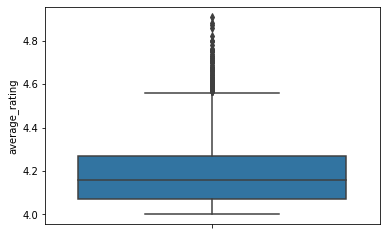

In [ ]:
sns.boxplot(y='average_rating',data=data_with_rate_over4);

# **Select Data with out outliers**

In [ ]:
data_with_rate_over4=df[(df['average_rating']>=4) & (df['average_rating']<=4.5) ].loc[:,['title','authors','language_code','average_rating','# num_pages','ratings_count','text_reviews_count']]
data_with_rate_over4

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,eng,4.47,320,5629932,70390
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,4.41,352,6267,272
8,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,eng,4.38,815,3602,258
9,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,eng,4.38,815,240189,3954
...,...,...,...,...,...,...,...
13701,Papa Please Get the Moon for Me,Eric Carle,eng,4.15,40,4359,209
13704,American Gods,Neil Gaiman,spa,4.11,477,58,6
13705,The Day I Swapped My Dad for Two Goldfish,Neil Gaiman-Dave McKean,en-US,4.03,64,8744,524
13711,The Faeries' Oracle,Brian Froud-Jessica Macbeth,eng,4.43,224,1550,38


# Calculating WR and add values to **data_with_rate_over4**

In [ ]:
weight_rates=calculate_WRating(data_with_rate_over4['average_rating'],data_with_rate_over4['ratings_count'],data_with_rate_over4['ratings_count'].min(),4.188533)
data_with_rate_over4['weight_rates']=weight_rates
data_with_rate_over4

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count,weight_rates
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613,4.49
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,eng,4.47,320,5629932,70390,4.47
3,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,eng,4.41,352,6267,272,4.41
8,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,eng,4.38,815,3602,258,4.38
9,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,eng,4.38,815,240189,3954,4.38
...,...,...,...,...,...,...,...,...
13701,Papa Please Get the Moon for Me,Eric Carle,eng,4.15,40,4359,209,4.15
13704,American Gods,Neil Gaiman,spa,4.11,477,58,6,4.11
13705,The Day I Swapped My Dad for Two Goldfish,Neil Gaiman-Dave McKean,en-US,4.03,64,8744,524,4.03
13711,The Faeries' Oracle,Brian Froud-Jessica Macbeth,eng,4.43,224,1550,38,4.43


# **Check if There is any na values**

In [ ]:
data_with_rate_over4.isna().sum()

title                  0
authors                0
language_code          0
average_rating         0
# num_pages            0
ratings_count          0
text_reviews_count     0
weight_rates          28
dtype: int64

# **Drop Na values**

In [ ]:
data_with_rate_over4.dropna(inplace=True)

# *Top 5 books with hieghest WR *

In [ ]:
top_5_with_hieghest_Wr=data_with_rate_over4.sort_values('ratings_count',ascending=False)[:5]
top_5_with_hieghest_Wr

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count,weight_rates
2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPr?©,eng,4.47,320,5629932,70390,4.47
2000,The Hobbit or There and Back Again,J.R.R. Tolkien,eng,4.26,366,2364968,31664,4.26
5299,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling-Mary GrandPr?©,eng,4.41,341,2115562,32694,4.41
25,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,eng,4.35,398,2009749,12784,4.35
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPr?©,eng,4.49,870,1996446,27613,4.49


the following figure will descripe the data of the top 5 heighest wr books



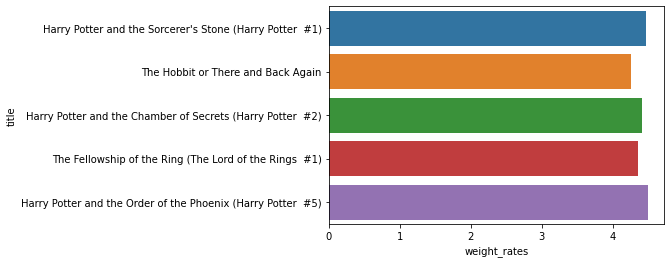

In [ ]:
print('the following figure will descripe the data of the top 5 heighest wr books\n')
sns.barplot(y='title',x='weight_rates',data=top_5_with_hieghest_Wr);

# **Display Number of books per authors**

In [ ]:
authors_with_noduplicates=data_with_rate_over4.loc[:,['authors']].drop_duplicates()
authors_with_noduplicates
no_books_per_author=data_with_rate_over4['authors'].value_counts()
authors_with_noduplicates['no_books_per_author']=data_with_rate_over4['authors'].map(no_books_per_author.to_dict())
authors_with_noduplicates

,authors,no_books_per_author
1,J.K. Rowling-Mary GrandPr?©,4
3,J.K. Rowling,9
8,Douglas Adams,14
11,Douglas Adams-Stephen Fry,1
13,Bill Bryson-William Roberts,1
...,...,...
13658,Poppy Z. Brite,3
13692,Garth Nix-Tim Curry,1
13700,Jos?© Saramago,1
13711,Brian Froud-Jessica Macbeth,1


# **Display Top 10 authors with max books count:**

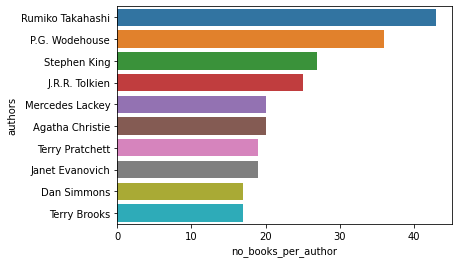

In [ ]:
Top_10_authors=authors_with_noduplicates.sort_values('no_books_per_author',ascending=False)[:10]
sns.barplot(y='authors',x='no_books_per_author',data=Top_10_authors)

# **Check if there is any duplicated in title**

In [ ]:
print('number of duplicated title is')
data_with_rate_over4.duplicated(subset = 'title').sum()

number of duplicated title is


530

In [ ]:
print('the counts of duplicate for each title are \n')
data_with_rate_over4['title'].value_counts()

the counts of duplicate for each title are 



'Salem's Lot                                                                      11
One Hundred Years of Solitude                                                     11
The Brothers Karamazov                                                            10
Collected Stories                                                                  9
The Lord of the Rings (The Lord of the Rings  #1-3)                                9
                                                                                  ..
The Twelve Caesars                                                                 1
Brideshead Revisited: The Sacred and Profane Memories of Captain Charles Ryder     1
The Story of a Seagull and the Cat Who Taught Her to Fly                           1
Teaching Classical Ballet                                                          1
A Tourist Guide to Lancre                                                          1
Name: title, Length: 5218, dtype: int64

In [ ]:
data_with_rate_over4[data_with_rate_over4['title']=="'Salem's Lot"]

,title,authors,language_code,average_rating,# num_pages,ratings_count,text_reviews_count,weight_rates
1845,'Salem's Lot,Stephen King-Jerry N. Uelsmann,eng,4.25,594,81170,504,4.25
1846,'Salem's Lot,Stephen King-Ron McLarty,eng,4.01,17,227,55,4.01
1847,'Salem's Lot,Stephen King,eng,4.01,405,959,121,4.01
1850,'Salem's Lot,Stephen King,eng,4.01,446,399,45,4.01
1851,'Salem's Lot,Stephen King,en-US,4.01,427,169,33,4.01
1852,'Salem's Lot,Stephen King,eng,4.01,586,24,6,4.01
3781,'Salem's Lot,Stephen King,eng,4.01,483,266312,5513,4.01
6059,'Salem's Lot,Stephen King,eng,4.01,631,3386,357,4.01
6397,'Salem's Lot,Stephen King-Ron McLarty,en-US,4.01,0,55,5,4.01
6399,'Salem's Lot,Stephen King,eng,4.01,817,14,3,4.01


# **Check the language of books and display how many books in each language.**

In [ ]:
list_of_lang = df['language_code'].unique()
print(list_of_lang)

['eng' 'en-US' 'spa' 'fre' 'en-GB' 'mul' 'ger' 'ara' 'por' 'grc' 'en-CA'
 'enm' 'jpn' 'dan' 'zho' 'nl' 'ita' 'lat' 'srp' 'rus' 'tur' 'msa' 'swe'
 'glg' 'cat' 'wel' 'heb' 'nor' 'gla' 'ale']


In [ ]:
# how many in each
langs = df['language_code'].value_counts()
print(langs)

eng      10594
en-US     1698
spa        419
en-GB      341
ger        238
fre        209
jpn         64
por         27
mul         21
ita         19
zho         16
grc         12
en-CA        9
rus          7
nl           7
swe          6
glg          4
enm          3
lat          3
tur          3
cat          3
ara          2
gla          1
msa          1
dan          1
heb          1
srp          1
nor          1
wel          1
ale          1
Name: language_code, dtype: int64


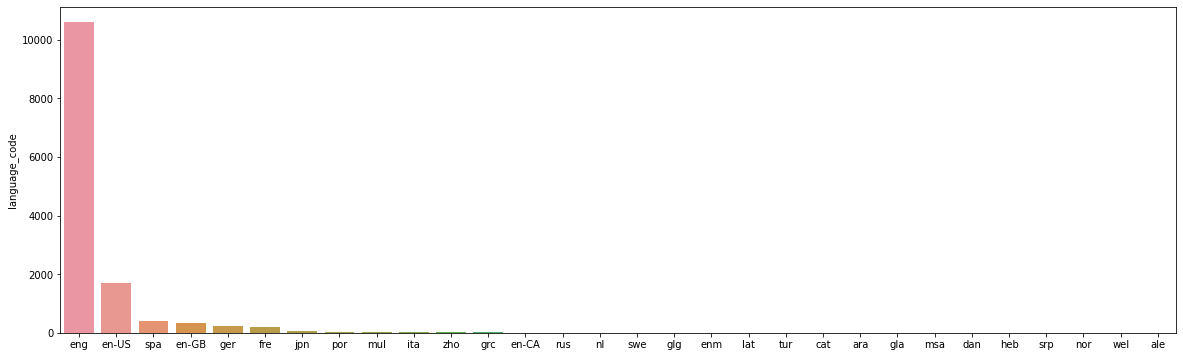

In [ ]:
# Set the width and height of the figure
plt.figure(figsize=(20,6))
sns.barplot(x=langs.index, y=langs);

# **Check Correlations between features**

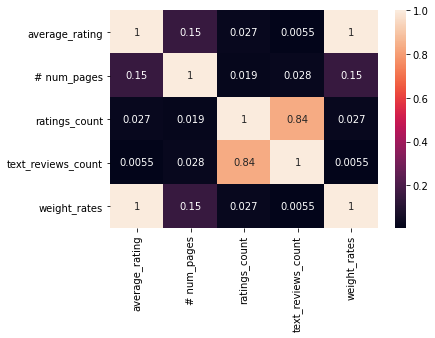

In [ ]:
corr=data_with_rate_over4.corr()
sns.heatmap(data=corr, annot=True);

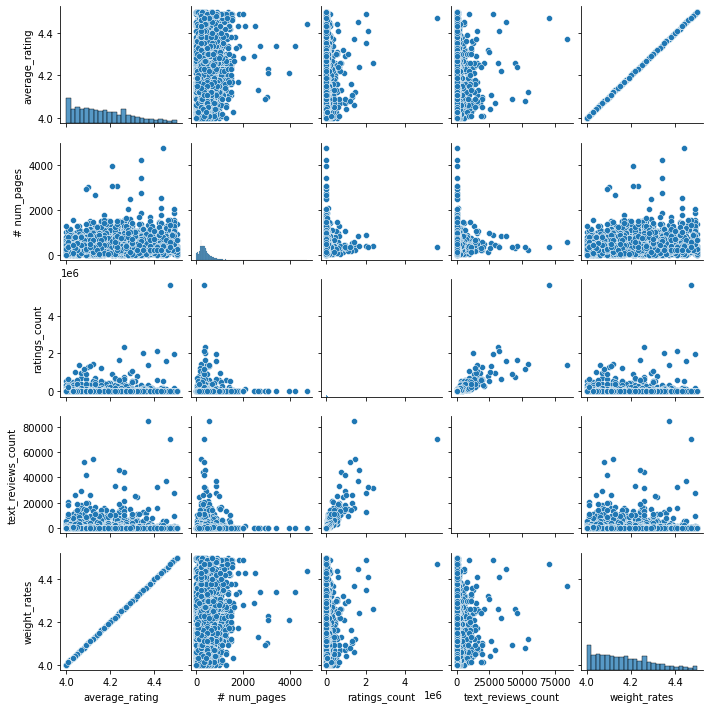

In [ ]:
sns.pairplot(data_with_rate_over4, height = 2)